<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 97 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   mushroom_id                 8124 non-null   int64
 1   class_p                     8124 non-null   int32
 2   cap-shape_c                 8124 non-null   int32
 3   cap-shape_f                 8124 non-null   int32
 4   cap-shape_k                 8124 non-null   int32
 5   cap-shape_s                 8124 non-null   int32
 6   cap-shape_x                 8124 non-null   int32
 7   cap-surface_g               8124 non-null   int32
 8   cap-surface_s               8124 non-null   int32
 9   cap-surface_y               8124 non-null   int32
 10  cap-color_c                 8124 non-null   int32
 11  cap-color_e                 8124 non-null   int32
 12  cap-color_g                 8124 non-null   int32
 13  cap-color_n                 8124 non-null   int32
 14  cap-colo

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

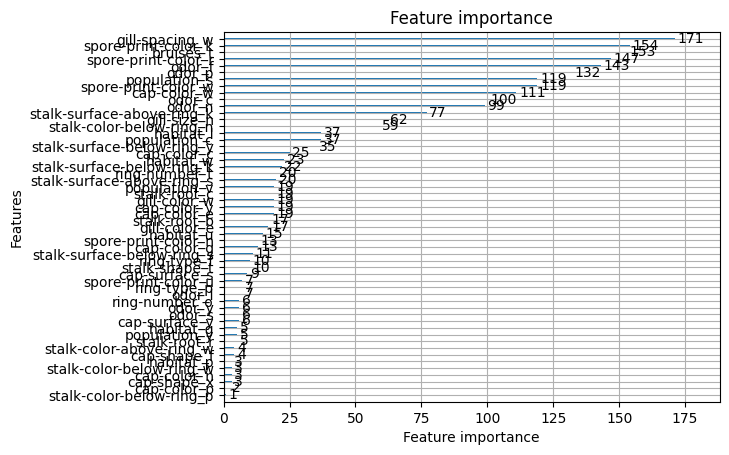

In [2]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("./data/mushroom_train.csv", encoding="utf-8")
test_df = pd.read_csv("./data/mushroom_test.csv", encoding="utf-8")
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df = pd.concat([train_df, test_df]).reset_index(drop=True)
df = pd.get_dummies(data=df, columns=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
           'ring-type', 'spore-print-color', 'population', 'habitat'], drop_first=True)
df = df*1
df
df.info()

test_df = test_df.drop(["class_p"],axis=1)
x_train = train_df.drop(['mushroom_id','class_p'],axis=1)
y_train = train_df['class_p']
x_test = test_df.drop(['mushroom_id'],axis=1)
from sklearn.model_selection import cross_val_score,KFold
import lightgbm as lgb
model = lgb.LGBMClassifier()
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
stratified_kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=1234)
param_grid = { "n_estimators":[400],"max_depth":[3,5],
    "num_leaves":[10],
    "subsample": [0.8]}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=stratified_kf
)
grid_search.fit(x_train, y_train)
grid_search.best_params_
grid_search.best_score_
model = lgb.LGBMClassifier(**grid_search.best_params_)
model.fit(x_train,y_train)
y_test_pred = model.predict(x_test)
test_df["class"] = y_test_pred
test_df["class"] = test_df["class"].replace([1,0],["p","e"])
test_df[["mushroom_id","class"]].to_csv("./data/mushroom_submission_12.csv", index=False)
test_df[test_df["class"] =="p"].count()
from lightgbm import plot_importance
plot_importance(model)